# House Price Regression

## Data Source
Dataset Link: [House Price Regression Dataset](https://www.kaggle.com/datasets/prokshitha/home-value-insights)

The **House Price Regression** dataset is designed to estimate house prices using different property characteristics. It includes features like the size of the house in square feet, the number of bedrooms and bathrooms, the year the house was built, the lot size, garage capacity, and the quality of the neighborhood. This dataset is intended for regression analysis and is especially beneficial for beginners who want to learn how to create and assess regression models within the realm of real estate pricing.

## Project Scope

### Objectives
1. **Develop a House Price Prediction Model**: Create a machine learning model to estimate house prices using features like square footage, number of bedrooms, number of bathrooms, year built, lot size, garage size, and neighborhood quality.
2. **Explore Housing Data**: Investigate how different house attributes (e.g., size, number of bathrooms, lot size) influence their market value.
3. **Enhance Real Estate Valuation**: Provide real estate professionals with accurate price predictions to improve property valuation and market analysis.

### Problems to be Solved
1. **Precise Price Estimation**: How can we accurately predict house prices based on specific property characteristics? What are the key factors that influence these prices?
2. **Efficiency in Valuation**: Can machine learning models streamline the process of estimating house prices, reducing the need for manual evaluations?
3. **Identifying Data Patterns**: What significant patterns and correlations exist in the data that link features like square footage or neighborhood quality to house prices?
4. **Model Reliability**: How can we ensure the model consistently provides accurate price predictions to minimize errors in property valuation?

## Import Library

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

### Load Dataset

In [467]:
df = pd.read_csv('./datasets/house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


**Dataset Description**

| **Feature** | **Description** |
|--------------------------|---------------------------------------------------------------------------------------------|
| `Square_Footage` | The size of the house in square feet. Larger homes typically have higher prices.                                                                   |
| `Num_Bedrooms` | The number of bedrooms in the house. More bedrooms generally increase the value of a home.                                               |
| `Num_Bathrooms` | The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.                               |
| `Year_Built` | The year the house was built. Older houses may be priced lower due to wear and tear.                                          |
| `Lot_Size` | The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.                         |
| `Garage_Size` | The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.                                              |
| `Neighborhood_Quality` | A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.                                              |
| `House_Price (Target Variable)` | The price of the house, which is the dependent variable you aim to predict.                                              |

### Data Assesing

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [469]:
df.describe(include='all')

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [470]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [471]:
print('Duplicated Data:', df.duplicated().sum())

Duplicated Data: 0


In [472]:
print('Unique Values in Any Column')
df.nunique()

Unique Values in Any Column


Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

Check Outliers

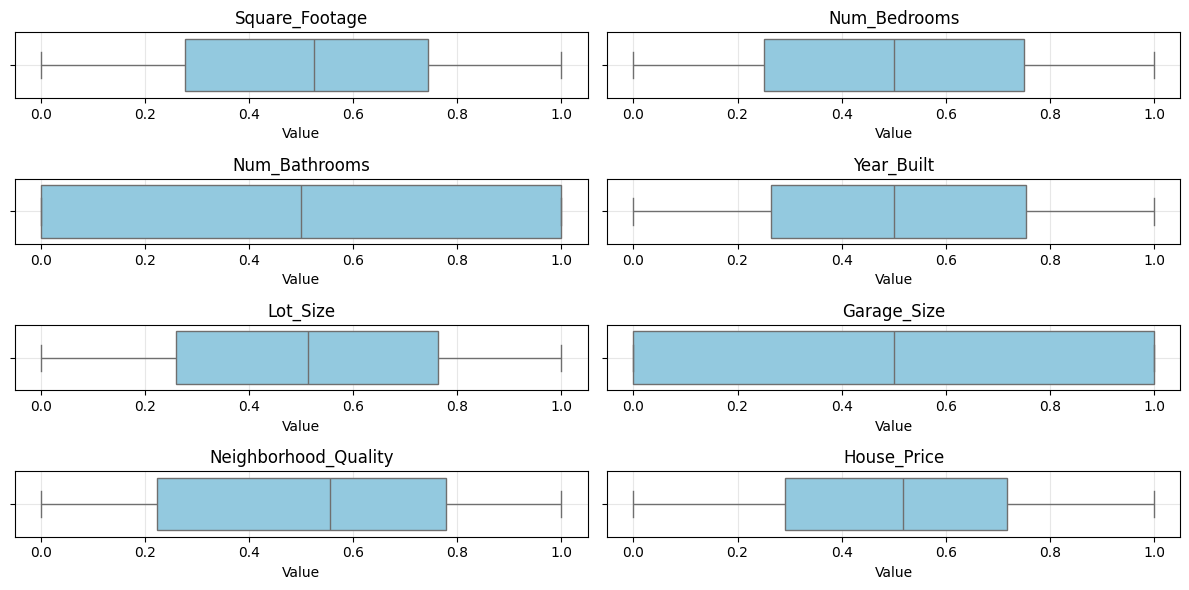

In [490]:
data_to_plot = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price']]
n_cols = len(data_to_plot.columns)
n_rows = (n_cols // 2) + (n_cols % 2)

plt.figure(figsize=(12, 6))

for i, col in enumerate(data_to_plot.columns):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(data=data_to_plot, x=col, color='skyblue')
    plt.title(f'{col}')
    plt.xlabel('Value')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Data Preprocessing

### Feature Engineering

In [474]:
df['Price_per_Square_Footage'] = df['House_Price'] / df['Square_Footage']
df['Age_of_House'] = pd.Timestamp.now().year - df['Year_Built']
df['Lot_Size_per_Square_Footage'] = df['Lot_Size'] / df['Square_Footage']
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Price_per_Square_Footage,Age_of_House,Lot_Size_per_Square_Footage
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,192.928568,43,0.000441
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,230.632222,8,0.001113
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,216.586133,8,0.001012
3,966,1,2,1977,2.730667,1,8,2.296989e+05,237.783560,47,0.002827
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,211.478047,31,0.000954


## Exploratory Data Analysis (EDA)

### Univariate Analysis

Square Footage

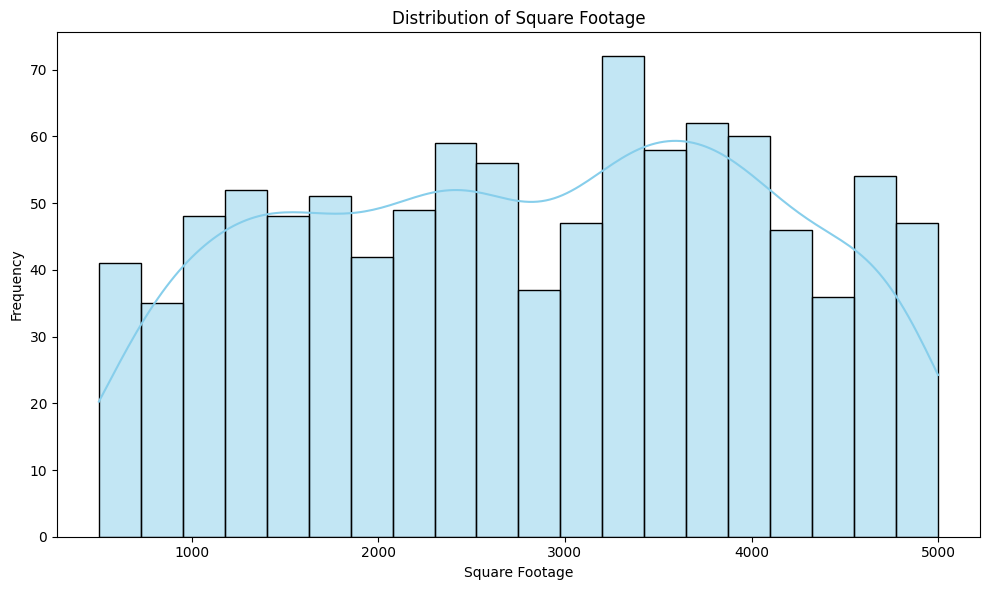

In [475]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Square_Footage'], kde='True', color='skyblue', bins=20)
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Num Bedrooms

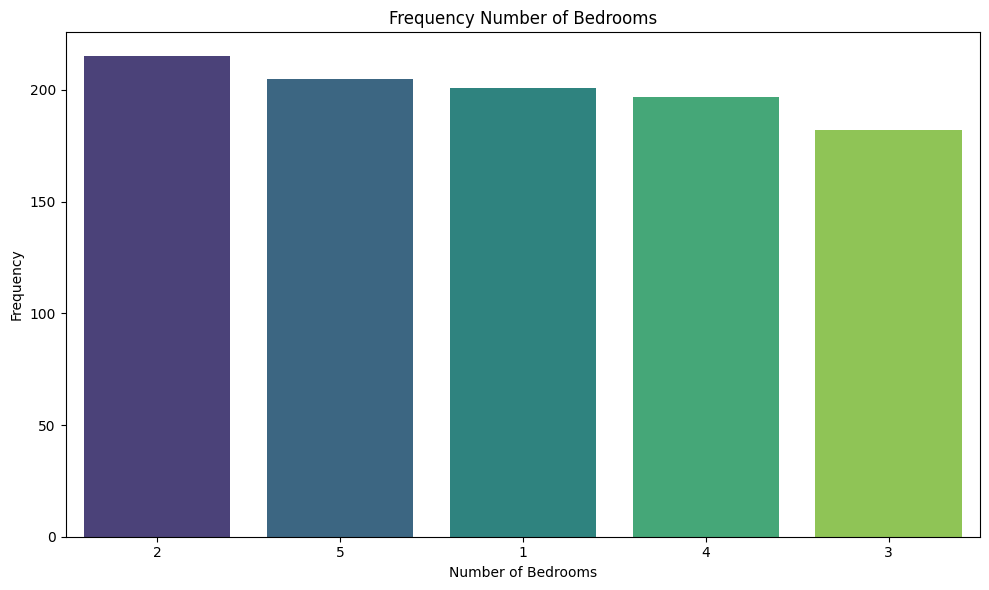

In [476]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df['Num_Bedrooms'], order=df['Num_Bedrooms'].value_counts().index, palette='viridis')
plt.title('Frequency Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Num Bathrooms

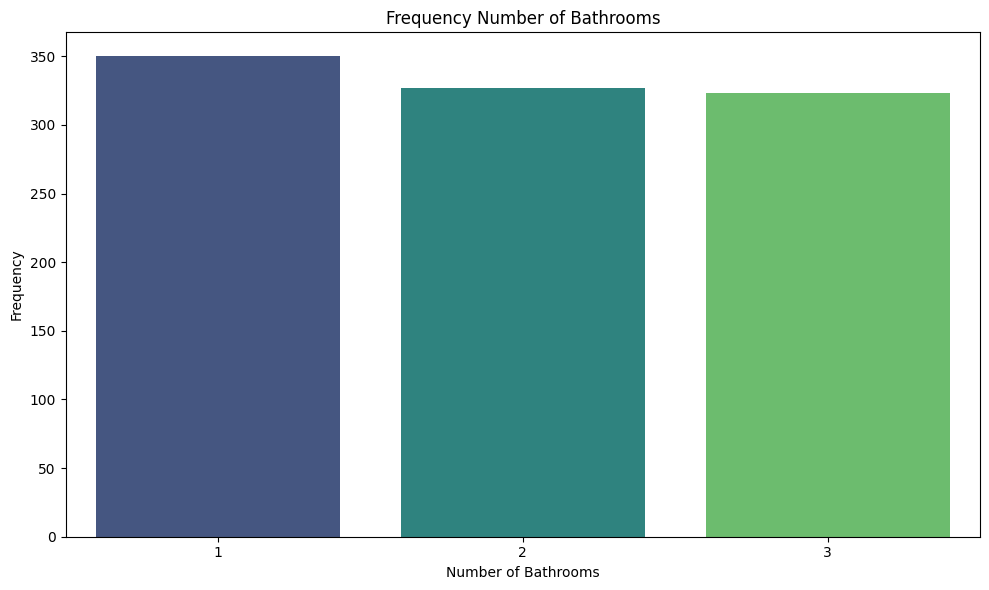

In [477]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df['Num_Bathrooms'], order = df['Num_Bathrooms'].value_counts().index, palette='viridis')
plt.title('Frequency Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Year Built

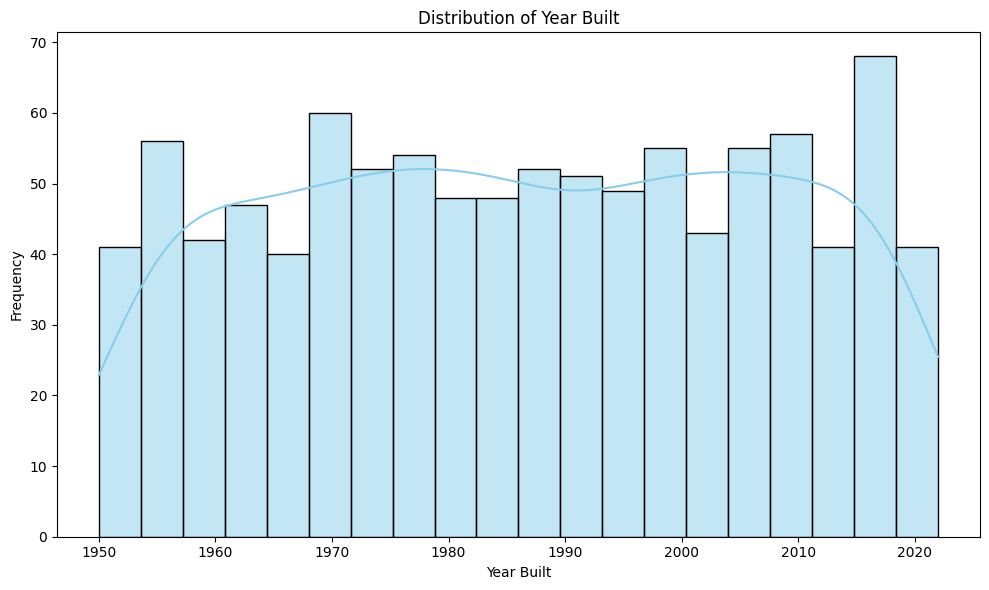

In [478]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Year_Built'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Lot Size

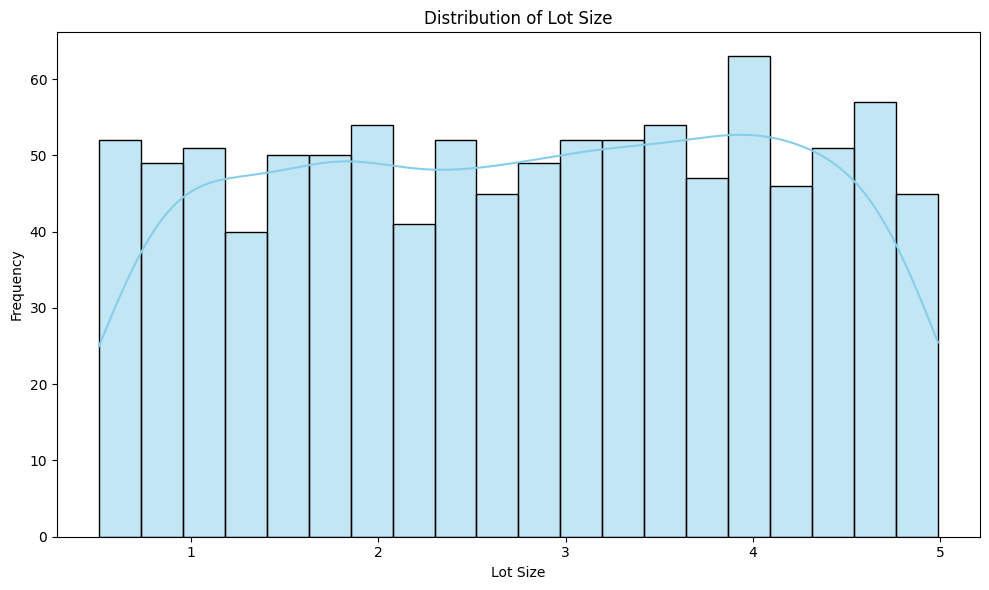

In [479]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Lot_Size'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Garage Size

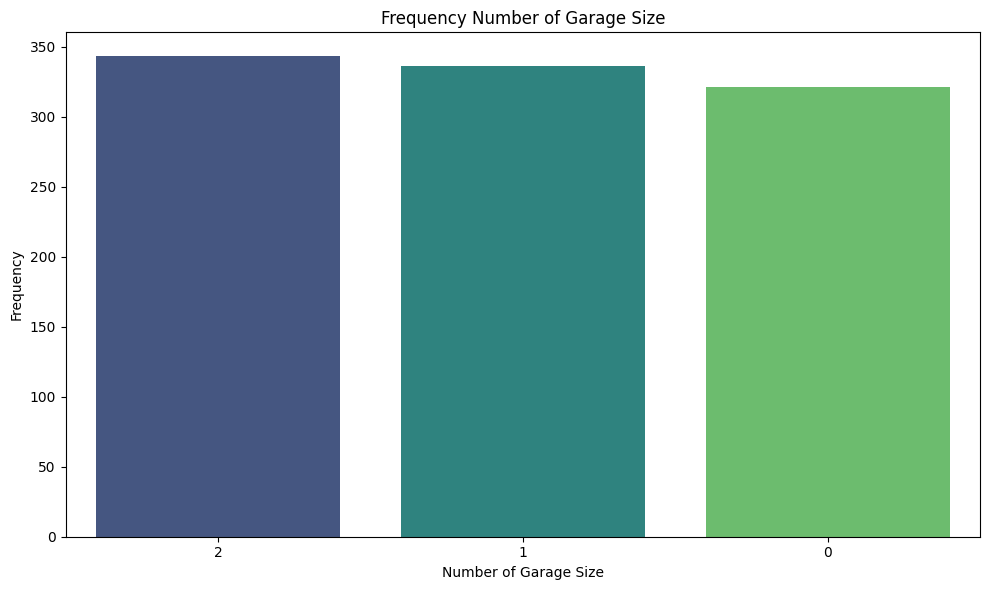

In [480]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df['Garage_Size'], order = df['Garage_Size'].value_counts().index, palette='viridis')
plt.title('Frequency Number of Garage Size')
plt.xlabel('Number of Garage Size')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Neighborhood_Quality

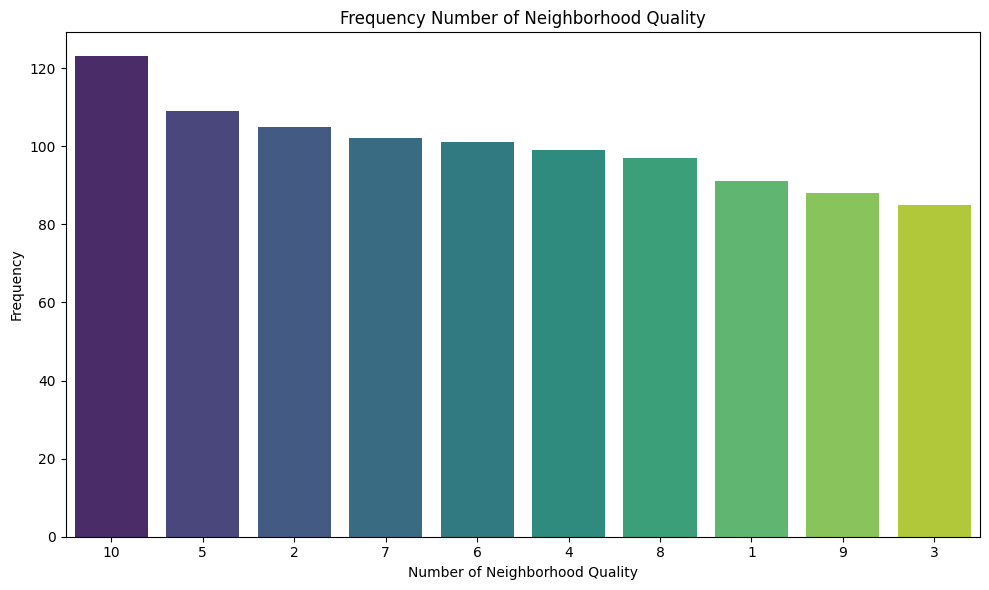

In [481]:
plt.figure(figsize=(10, 6))

sns.countplot(x = df['Neighborhood_Quality'], order = df['Neighborhood_Quality'].value_counts().index, palette='viridis')
plt.title('Frequency Number of Neighborhood Quality')
plt.xlabel('Number of Neighborhood Quality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

House Price

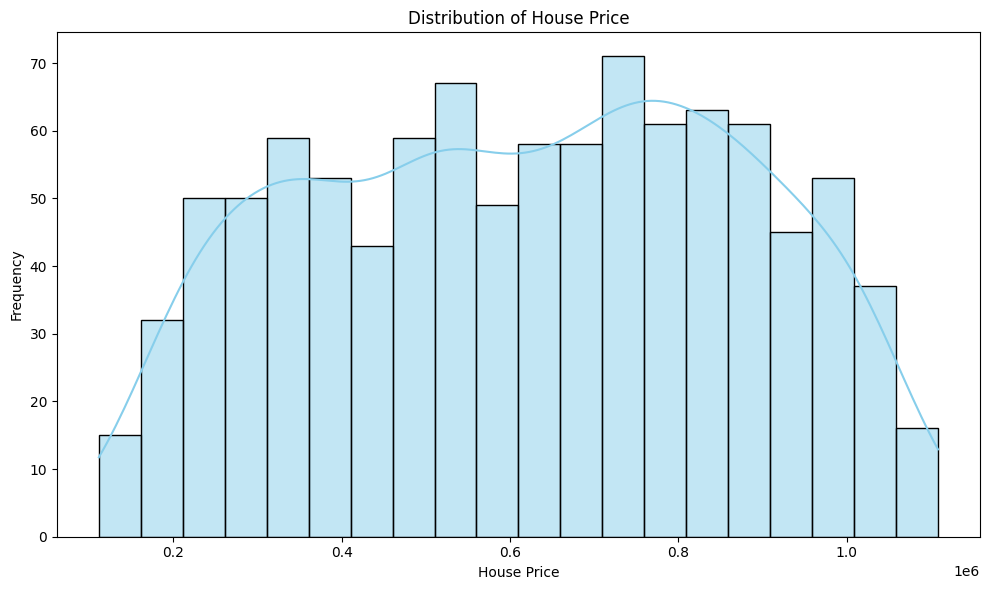

In [482]:
plt.figure(figsize=(10, 6))

sns.histplot(df['House_Price'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of House Price')
plt.xlabel('House Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Price per Square Footage

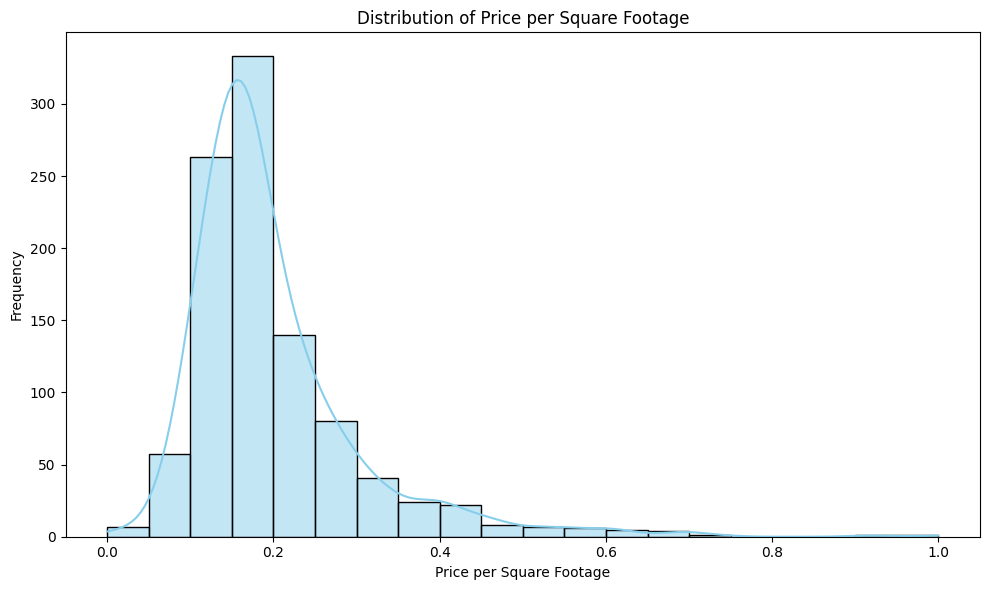

In [491]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Price_per_Square_Footage'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Price per Square Footage')
plt.xlabel('Price per Square Footage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Age of House

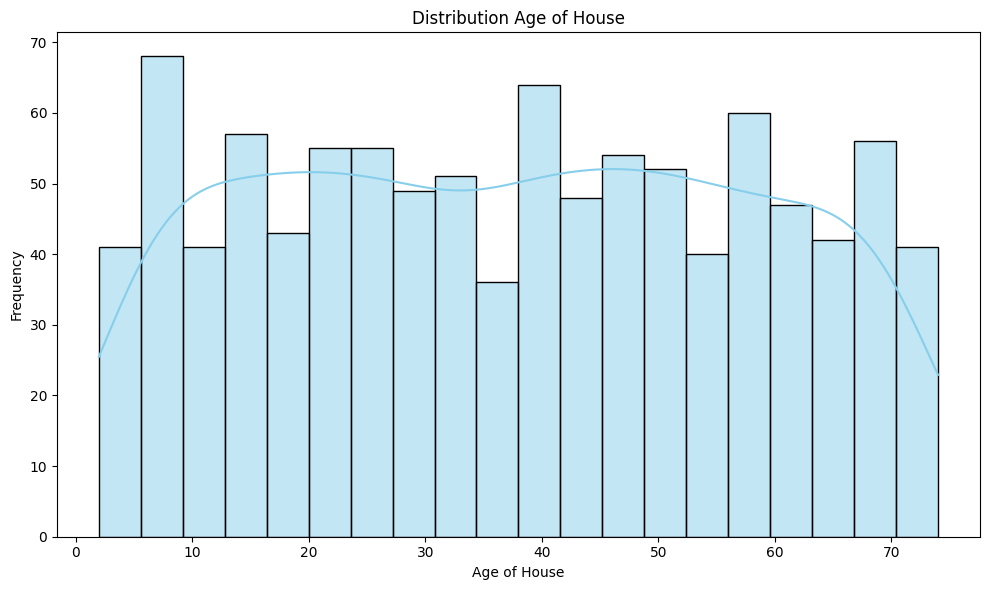

In [483]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Age_of_House'], kde=True, color='skyblue', bins=20)
plt.title('Distribution Age of House')
plt.xlabel('Age of House')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Lot Size per Square Footage

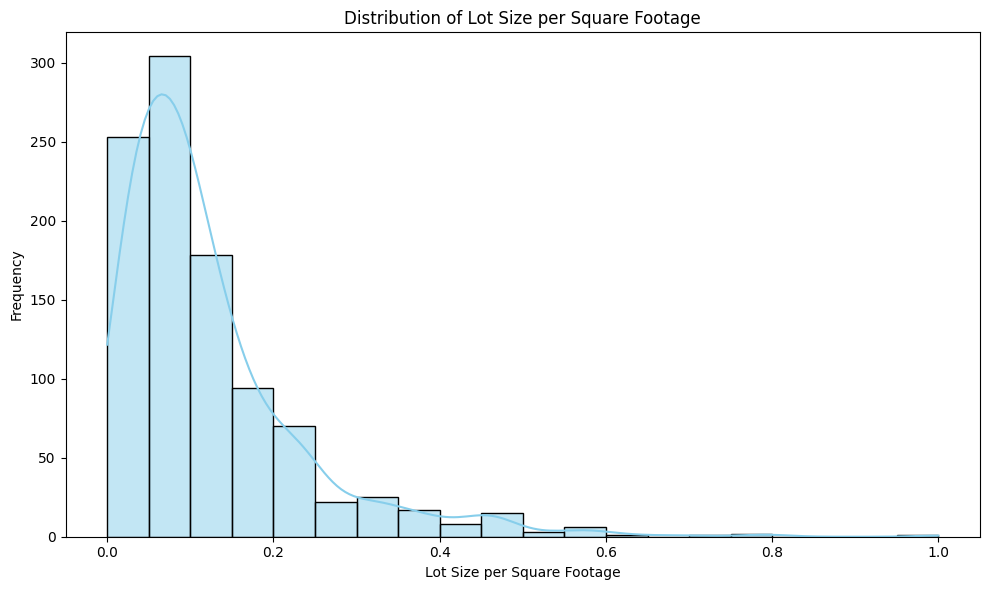

In [492]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Lot_Size_per_Square_Footage'], kde='True', color='skyblue', bins=20)
plt.title('Distribution of Lot Size per Square Footage')
plt.xlabel('Lot Size per Square Footage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [493]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price',
       'Price_per_Square_Footage', 'Age_of_House',
       'Lot_Size_per_Square_Footage'],
      dtype='object')

Square Footage vs House Price

Num Bedrooms vs House Price

Num Bathrooms vs House Price

Year Built vs House Price

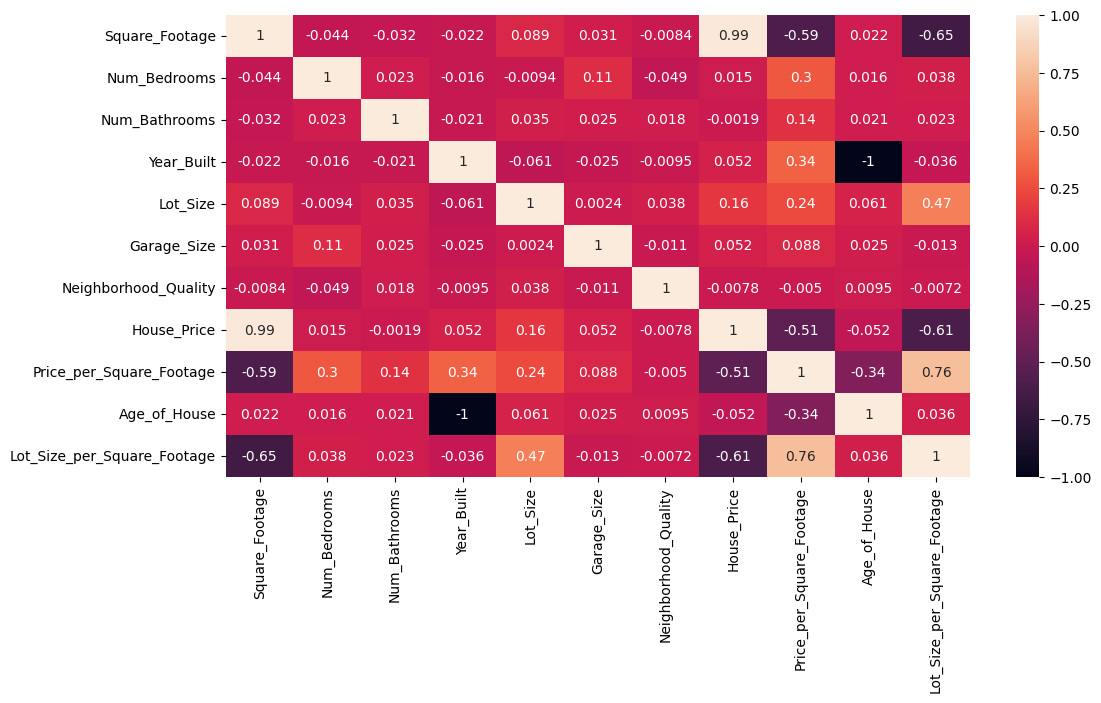

In [484]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Scaling & Normalization

In [485]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include = ['int', 'float64'])
df[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

In [486]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Price_per_Square_Footage,Age_of_House,Lot_Size_per_Square_Footage
0,0.190614,0.25,0.0,0.430556,0.020873,0.0,0.444444,0.151269,0.066442,0.569444,0.033918
1,0.838301,0.50,1.0,0.916667,0.947295,0.5,0.555556,0.876606,0.214531,0.083333,0.102905
2,0.687055,0.00,0.5,0.916667,0.697880,0.0,0.888889,0.668617,0.159362,0.083333,0.092565
3,0.102980,0.00,0.5,0.375000,0.496205,0.5,0.777778,0.118474,0.242620,0.625000,0.278962
4,0.983763,0.25,0.0,0.597222,0.935263,0.0,0.777778,0.933278,0.139299,0.402778,0.086609
